In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer                                             # null values ko fill krte by mean or median
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from category_encoders import OrdinalEncoder                                          # isme hmm one hot ki tarah values nhi dete here we give natural numbers
from sklearn.tree import DecisionTreeClassifier, plot_tree
from teaching_tools.widgets import ConfusionMatrixWidget

In [117]:
!pip install teaching_tools

In [118]:
!pip install category_encoders

In [119]:
df=pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [120]:
df.shape

(4238, 16)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [122]:
x=df.drop(columns="TenYearCHD")
y=df.TenYearCHD

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)



In [124]:
x_train.shape

(3390, 15)

In [125]:
model = make_pipeline(

    SimpleImputer(),
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42)
)
model.fit(x_train,y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [126]:
L=range(1,26)
for max_depth in L:
 model = make_pipeline(

    SimpleImputer(),
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=max_depth ,random_state=42)
   )
 model.fit(x_train,y_train)
 print( model.score(x_val,y_val) )

0.8537735849056604
0.8525943396226415
0.8466981132075472
0.8419811320754716
0.8466981132075472
0.8384433962264151
0.847877358490566
0.839622641509434
0.8195754716981132
0.8266509433962265
0.8254716981132075
0.8195754716981132
0.8077830188679245
0.7995283018867925
0.7959905660377359
0.7900943396226415
0.777122641509434
0.777122641509434
0.7676886792452831
0.7700471698113207
0.7783018867924528
0.7688679245283019
0.7629716981132075
0.7653301886792453
0.7606132075471698


In [127]:
model.score(x_train,y_train)

0.9997050147492625

In [128]:
model.score(x_val,y_val)

0.7606132075471698

In [129]:
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 25


In [130]:
depth_hyperparams = range(1,26,2)

In [131]:
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`
    test_model = make_pipeline(
       SimpleImputer(),
       OrdinalEncoder(),
       DecisionTreeClassifier(max_depth = d,random_state=42)
    )
    # Fit model to training data
    test_model.fit(x_train, y_train)
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(x_train,y_train))
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(test_model.score(x_val,y_val))

print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.8466076696165191, 0.8489675516224189, 0.8631268436578171]
Validation Accuracy Scores: [0.8537735849056604, 0.8466981132075472, 0.8466981132075472]


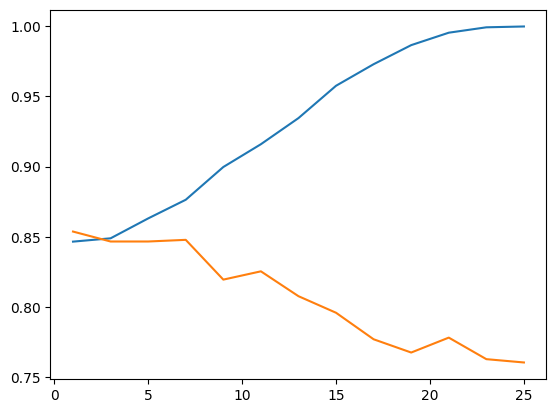

In [132]:
plt.plot(depth_hyperparams, training_acc, label = "training")
plt.plot(depth_hyperparams, validation_acc, label = "val")

In [133]:
over_sampler=RandomOverSampler(random_state=42)
x_train_over,y_train_over=over_sampler.fit_resample(x_train,y_train)
print(x_train_over.shape)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_over,y_train_over, test_size = 0.2, random_state=42
)

(5740, 15)


In [134]:
clf = make_pipeline(

        SimpleImputer(),
        RandomForestClassifier()

)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier', RandomForestClassifier())])


In [136]:
cv_acc_scores = cross_val_score(clf, x_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.97560976 0.9738676  0.98344948 0.9738676  0.97212544]


In [138]:
params = {
    "simpleimputer__strategy": ["mean","median"],
    "randomforestclassifier__n_estimators": range(25,100,25),
    "randomforestclassifier__max_depth": range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [139]:
model =  GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs = -1,
    verbose=1
)

In [140]:
model.fit(x_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [141]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.454794,0.101074,0.021246,0.008789,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.864111,0.857143,0.874564,0.875436,0.864983,0.867247,0.006894,24
1,0.445080,0.047745,0.021130,0.009447,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.871951,0.866725,0.880662,0.885889,0.871080,0.875261,0.006977,22
2,0.721418,0.155497,0.034951,0.020923,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.875436,0.863240,0.877178,0.892857,0.877178,0.877178,0.009414,20
3,0.467555,0.046005,0.020997,0.000385,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.878049,0.851916,0.864983,0.892857,0.871951,0.871951,0.013596,23
4,0.861696,0.294352,0.038319,0.017135,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.873693,0.865854,0.871080,0.891986,0.876307,0.875784,0.008808,21
5,1.287055,0.073032,0.050101,0.016037,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.886760,0.860627,0.862369,0.896341,0.886760,0.878571,0.014383,19
6,0.285954,0.005607,0.016512,0.000705,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.959059,0.963415,0.972125,0.967770,0.962544,0.964983,0.004523,17
7,0.279792,0.006827,0.014824,0.000447,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.970383,0.967770,0.969512,0.960801,0.960801,0.965854,0.004210,16
8,0.509994,0.012976,0.024942,0.001421,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.970383,0.975610,0.974739,0.977352,0.967770,0.973171,0.003545,10
9,0.514856,0.010939,0.024903,0.001248,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.972997,0.977352,0.973868,0.973868,0.972125,0.974042,0.001777,7


In [142]:
acc_train = model.score(x_train_over,y_train_over)
acc_test = model.score(x_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.8432


In [143]:
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=75))])

In [144]:
clfgf = make_pipeline(

    SimpleImputer(),
    GradientBoostingClassifier()
)


In [145]:
paramsg = {
    "simpleimputer__strategy": ["mean","median"],
    "gradientboostingclassifier__n_estimators": range(20,31,5),
    "gradientboostingclassifier__max_depth": range(2,5)



}

paramsg

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [146]:
modelgf =  GridSearchCV(
    clfgf,
    param_grid=paramsg,
    cv=5,
    n_jobs = -1,
    verbose=1
)

In [147]:
modelgf.fit(x_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [148]:
results = pd.DataFrame(modelgf.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.483146,0.024976,0.006575,0.000791,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.723868,0.727352,0.713415,0.749129,0.731707,0.729094,0.011700,1
16,0.474885,0.010207,0.006578,0.000259,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.723868,0.718641,0.714286,0.748258,0.734321,0.727875,0.012190,2
15,0.401076,0.009428,0.006610,0.000234,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.722997,0.721254,0.706446,0.744774,0.732578,0.725610,0.012719,3
14,0.403176,0.007509,0.006628,0.000368,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.721254,0.709930,0.707317,0.739547,0.722125,0.720035,0.011405,4
13,0.330128,0.004641,0.006443,0.000515,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.714286,0.714286,0.696864,0.732578,0.718641,0.715331,0.011416,5
12,0.564717,0.103830,0.008224,0.002013,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.716028,0.710801,0.694251,0.714286,0.712544,0.709582,0.007861,6
11,0.798137,0.010449,0.012403,0.004031,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.693380,0.693380,0.686411,0.705575,0.714286,0.698606,0.009978,7
10,0.528534,0.160947,0.013703,0.006470,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.702962,0.693380,0.688153,0.698606,0.704704,0.697561,0.006120,8
9,0.511005,0.067861,0.012810,0.006772,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.689024,0.689895,0.674216,0.702091,0.709930,0.693031,0.012227,9
6,0.398449,0.071305,0.011502,0.005910,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.689024,0.684669,0.682056,0.695993,0.708188,0.691986,0.009375,10


In [149]:
acc_train = modelgf.score(x_train_over,y_train_over)
acc_test = modelgf.score(x_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.7479
Test Accuracy: 0.6545


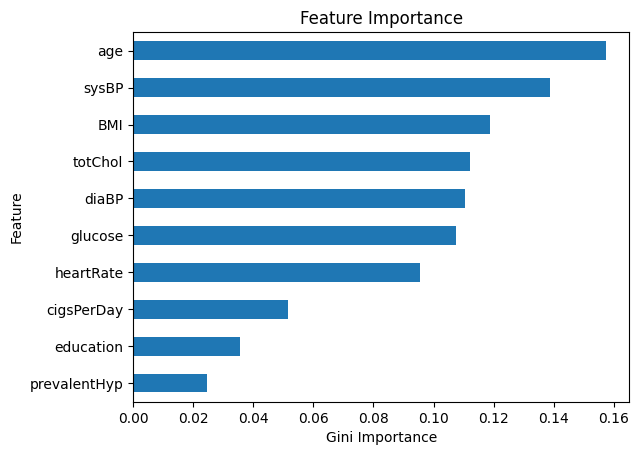

In [150]:
# Get feature names from training data
features = x_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()
# Plot 10 most important features

feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [151]:
c = ConfusionMatrixWidget(model, x_test, y_test)
c.show()

FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0)